In [1]:
import random
import math
import numpy as np
import pandas as pd
from math import sqrt as sqrt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as stats

from statsmodels.tsa.api import SARIMAX

from proj_1 import *
seed = 1416 #for sigma sq repara

# generating ar series'

1) select values of transformed variables [0.1,0.1,0.1]
2) calculate partials
3) move to paramater space



In [2]:
#ar1
u  = [0.1]
p = len(u)
v = np.tanh(u)
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1,0.1]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [0.09966799] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -616.709
Date:                Tue, 06 Aug 2024   AIC                           1237.417
Time:                        13:36:30   BIC                           1247.231
Sample:                             0   HQIC                          1241.147
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0933      0.033      2.809      0.005       0.028       0.158
sigma2         0.2012      0.009     21.358      0.000       0.183       0.220
Ljung-Box 

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\1553037408.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [3]:
#ar2
u = [0.1,0.1]
p = len(u)
v = np.tanh(u)
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1,0.1,0.1]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [0.08973429 0.09966799] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  998
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -615.100
Date:                Tue, 06 Aug 2024   AIC                           1236.199
Time:                        13:36:30   BIC                           1250.916
Sample:                             0   HQIC                          1241.793
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0852      0.033      2.568      0.010       0.020       0.150
ar.L2          0.0785      0.032      2.417      0.016       0.015       0.142

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\1171210126.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [4]:
#ar3
u = [0.1,0.1,0.1]
p = len(u)
v = np.tanh(u)
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1,0.1,0.1,0.1]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [0.07980058 0.09072436 0.09966799] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  997
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -614.780
Date:                Tue, 06 Aug 2024   AIC                           1237.560
Time:                        13:36:31   BIC                           1257.179
Sample:                             0   HQIC                          1245.018
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.033      2.204      0.028       0.008       0.138
ar.L2          0.0743      0.032      2.297      0.022       0.011 

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\3009644207.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [5]:
#ar4
u = [0.1,0.1,0.1, 0.1]
p = len(u)
v = np.tanh(u)
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1,0.1,0.1,0.1, 0.1]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [0.06986687 0.08168204 0.09171443 0.09966799] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  996
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -614.569
Date:                Tue, 06 Aug 2024   AIC                           1239.138
Time:                        13:36:31   BIC                           1263.657
Sample:                             0   HQIC                          1248.459
                                - 996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.033      2.083      0.037       0.004       0.135
ar.L2          0.0667      0.032      2.060      0.039  

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\1954938677.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [6]:
#ar5
u = [0.1,0.1,0.1, 0.1, 0.1]
p = len(u)
#v = np.tanh(u)
v = [0.9, 0.9, 0.9, 0.9, 0.9]
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1,0.1,0.1,0.1, 0.1, 0.1]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [-2.34    -1.3113   1.47429  2.277    0.9    ] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  995
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -617.658
Date:                Tue, 06 Aug 2024   AIC                           1247.317
Time:                        13:36:31   BIC                           1276.733
Sample:                             0   HQIC                          1258.500
                                - 995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.3657      0.013   -185.675      0.000      -2.391      -2.341
ar.L2         -1.3578      0.020    -66.549      0.000 

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\danie\AppData\Local\Temp\ipykernel_14340\1270477928.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [7]:
#ar8: the last stable result 
u = [0.1,0.1,0.1, 0.1, 0.1]
#p = len(u)
p = 8
#v = np.tanh(u)
v = [0.7 for i in range(p)] #slightly different initial setup due to experimenting with values 
psi = barndorff_schou_transformation(v)
sigma2 = 0.2
print("psi actual", psi, "sigma2 actual", sigma2)
y, X,noise = gen_data(psi, sigma2 )
param_i = [0.1 for i in range(p+1)]
np.random.seed(seed)

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid) 
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:len(psi)])), "sigma2 approx",sigma2_to_sq(results.x[-1]))

psi actual [-2.73       -3.7835     -2.61779     0.41944119  3.1135832   3.6302
  2.268       0.7       ] sigma2 actual 0.2
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  992
Model:               SARIMAX(8, 0, 0)   Log Likelihood                -626.808
Date:                Tue, 06 Aug 2024   AIC                           1271.617
Time:                        13:36:32   BIC                           1315.714
Sample:                             0   HQIC                          1288.383
                                - 992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7187      0.024   -112.987      0.000      -2.766      -2.671
ar.L2  

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\2318123872.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


# test with rollpred data

ar40

In [10]:
#using the parameters from sarimax as initials for my mle

y_test = pd.read_csv("rollpred_filter_test_ds.csv", header = None)
y_test = y_test[0]
p = 40
y = pd.read_csv("rollpred_filter_train_ds.csv" , header = None)
y = y[0]
N = len(y)
np.random.seed(seed)

X_temp = pd.DataFrame()
for i in range(p-1,0-1,-1):
    X = y[(i):(N-p+i)]
    X_temp["lag"+str(p-i)] = list(X) #has memory of its index 
X = X_temp.to_numpy()
y = np.array(y[p:N])

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

sarimax_params = sarimax_res.arparams
results_as_html = sarimax_res.summary().tables[1].as_html()
res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
sarimax_sig = list(res_pd["coef"])[-1]
#sarimax_sig = np.var(sarimax_res.resid)
non_restricted = np.arctanh(ARToPacf(sarimax_params))
param_i = list(non_restricted) + [sq_to_sigma2(sarimax_sig)]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2960
Model:              SARIMAX(40, 0, 0)   Log Likelihood               20773.264
Date:                Tue, 06 Aug 2024   AIC                         -41464.528
Time:                        13:40:28   BIC                         -41218.817
Sample:                             0   HQIC                        -41376.086
                               - 2960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          4.3644      0.004   1067.401      0.000       4.356       4.372
ar.L2         -6.3618      0.013   -477.939      0.000      -6.388      -6.336
ar.L3          1.6196      0.013    128.669      0.0

C:\Users\danie\AppData\Local\Temp\ipykernel_14340\358415136.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [20]:
#for checking fitted values fn 
#sarimax_res.fittedvalues[40:50], fitted[0:10]

[-0.23489360484235136,
 -0.8515290714008467,
 -1.375589692230802,
 -1.7119903493652355,
 -1.7965445325797151,
 -1.6064763609783907,
 -1.1619841945482765,
 -0.5241677533376748,
 0.22004974054701318,
 0.9644746180953341]

In [17]:
#my fn

np.random.seed(seed)
results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:p])), "sigma2 approx",sigma2_to_sq(results.x[-1]))
print("final negative log likelihood", results.fun)

#forecast values 
phi_approx = barndorff_schou_transformation(np.tanh(results.x[0:p]))
forecast_param = predicting_values(y, p, N, phi_approx, forecast_len = 125)

#fitting values 
phi_approx = barndorff_schou_transformation(np.tanh(results.x[0:p]))
phi_approx = np.array(phi_approx)
#phi_approx = sarimax_res.arparams # to check if identical fitting values
fitted = fitting_values(y,p, phi_approx)

#mse for fitted 
print("MSE of fitted to true for SARIMAX initials", mse(y[p:N], fitted))
print("MSE of fitted to true for SARIMAX initials", mse(y_test , forecast_param))

[ 4.36440275e+00 -6.36183137e+00  1.61957665e+00  3.20390210e+00
  9.44783604e-02 -2.48456631e+00 -1.25811648e+00  8.88949093e-01
  1.70107309e+00  7.01257759e-01 -8.05034385e-01 -1.35186558e+00
 -5.41035925e-01  7.27423522e-01  7.87604586e-01  8.00060607e-01
 -4.74898264e-01 -7.27962370e-01 -9.76720755e-01  5.91858411e-01
  5.96955005e-01  5.45972891e-01 -2.64947737e-02 -7.40963289e-01
 -1.71599594e-01 -3.47813066e-01  5.29933383e-01  5.92493108e-01
 -1.61310272e-01 -1.82229221e-01 -4.14948066e-01 -1.57657383e-01
  4.77328675e-01  2.73598519e-01 -1.15209572e-01 -5.20356121e-01
  3.23433438e-01  4.49372340e-02 -5.30690753e-02  8.04438171e-04] 4.548999999999999e-08 -20809.084550677602
[ 4.36440275e+00 -6.36183138e+00  1.61957665e+00  3.20390211e+00
  9.44783609e-02 -2.48456632e+00 -1.25811649e+00  8.88949095e-01
  1.70107309e+00  7.01257762e-01 -8.05034387e-01 -1.35186559e+00
 -5.41035927e-01  7.27423524e-01  7.87604590e-01  8.00060610e-01
 -4.74898265e-01 -7.27962373e-01 -9.76720757e-0

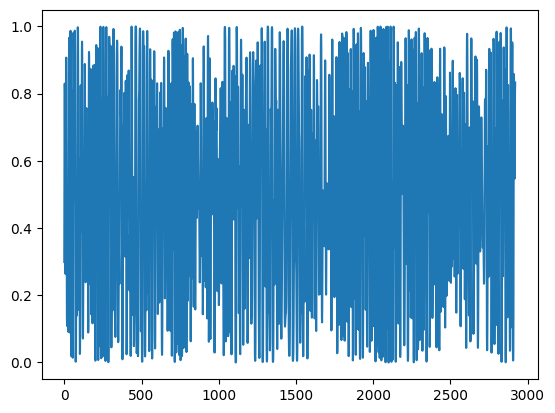

In [ ]:
# Transform to uniform marginals
U_1t_sim = stats.norm.cdf(y[p:(len(y)+1)], fitted, np.sqrt(sigma2_to_sq(results.x[-1]) ) ) #pnorm
data_sim = pd.DataFrame(U_1t_sim, columns = ["U_1t_sim"])
data_sim.to_csv("U_1t.csv")

plt.plot(U_1t_sim)
plt.show()

In [ ]:
#prepping graph arrays

sarimax_ci_down = sarimax_res.get_forecast(125).summary_frame()["mean_ci_lower"]
sarimax_ci_up = sarimax_res.get_forecast(125).summary_frame()["mean_ci_upper"]

matlab_result = pd.read_csv("rollpred_matlabresult.csv", header = None)
matlab_ci_up = pd.read_csv("rollpred_matlabresult_up_ci.csv", header = None)
matlab_ci_down = pd.read_csv("rollpred_matlabresult_down_ci.csv", header = None)

matlab_ci_up = np.array(matlab_ci_up).flatten()
matlab_ci_down = np.array(matlab_ci_down).flatten()

y_graph = list(y[-125:3000])
y_graph = y_graph + list(y_test)

[-5.05416648e+00 -1.60286719e+01 -3.98369595e+01 -8.42813148e+01
 -1.58998038e+02 -2.73036092e+02 -4.32713271e+02 -6.38957527e+02
 -8.84840010e+02 -1.15472368e+03 -1.42313954e+03 -1.65744770e+03
 -1.82171274e+03 -1.88216696e+03 -1.81360403e+03 -1.60361845e+03
 -1.25722797e+03 -7.97632020e+02 -2.63712065e+02  2.94690396e+02
  8.24898423e+02  1.27784522e+03  1.61563215e+03  1.81653234e+03
  1.87678138e+03  1.80992842e+03  1.64189742e+03  1.40640263e+03
  1.13907384e+03  8.71813029e+02  6.29395907e+02  4.26753097e+02
  2.70082505e+02  1.58205772e+02  8.47004341e+01  4.07602746e+01
  1.70166835e+01  5.77517719e+00  1.40700113e+00  1.39111006e-01] 0.05151094185674487 5287659559173.867
[-5.05416648e+00 -1.60286719e+01 -3.98369594e+01 -8.42813147e+01
 -1.58998037e+02 -2.73036092e+02 -4.32713270e+02 -6.38957526e+02
 -8.84840008e+02 -1.15472368e+03 -1.42313954e+03 -1.65744769e+03
 -1.82171274e+03 -1.88216696e+03 -1.81360402e+03 -1.60361845e+03
 -1.25722797e+03 -7.97632019e+02 -2.63712064e+02  2

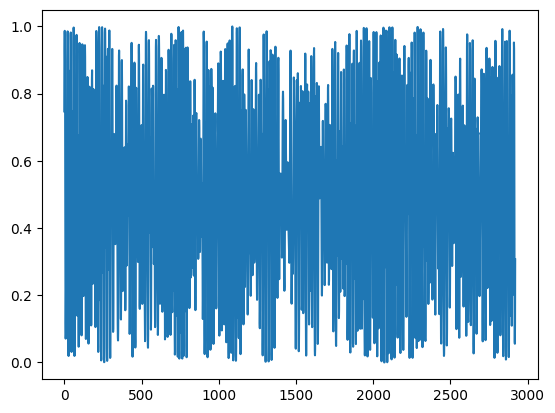

MSE of fitted to true for random initials 3.8100400098549307e-07
MSE of predicted to true for random initials 0.5006013137880787


In [ ]:
#no initial params from sarimax
p = 40
y = pd.read_csv("rollpred_filter_train_ds.csv")
y = y["x"]
N = len(y)

X_temp = pd.DataFrame()#0,index = range(0,N-p), columns = col)
for i in range(p-1,0-1,-1):
    X = y[(i):(N-p+i)]
    X_temp["lag"+str(p-i)] = list(X) #has memory of its index 
    
X = X_temp.to_numpy()
y = np.array(y[p:N])

np.random.seed(seed)
param_i = [np.random.uniform() for i in range(p+1)]

results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:p])), "sigma2 approx",sigma2_to_sq(results.x[-1]))
print("final negative log likelihood", results.fun)

#prediction fn
phi_approx = barndorff_schou_transformation(np.tanh(results.x[0:p]))
#phi_approx = sarimax_res.arparams #to test fitting fn 
forecast_noparam = predicting_values(y, p, N, phi_approx, forecast_len = 125)

fitted = fitting_values(y,p, phi_approx)

U_1t_sim = stats.norm.cdf(y[p:(len(y)+1)], fitted, np.sqrt(sigma2_to_sq(results.x[-1]) ) ) #pnorm
data_sim = pd.DataFrame(U_1t_sim, columns = ["U_1t_sim"])
#data_sim.to_csv("U_1t.csv")

plt.plot(U_1t_sim)
plt.show()

print("MSE of fitted to true for random initials",mse(y[p:N], fitted))
print("MSE of predicted to true for random initials",mse(y_test, forecast_noparam))

the x axis is switching from 125 points to be between 0 and 6 periods to align with the graph from erics

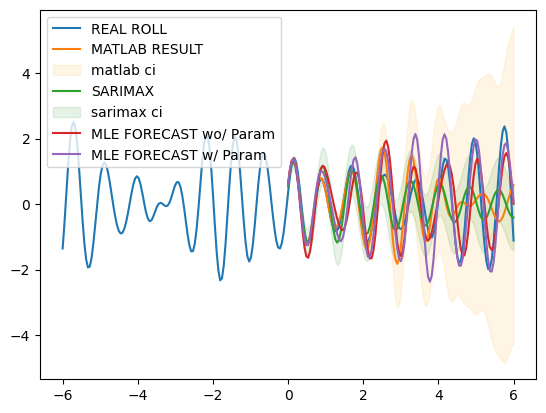

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(-6,6,250),y_graph)
ax.plot(np.linspace(0,6,125),matlab_result)
ax.fill_between(np.linspace(0,6,125), matlab_ci_up, matlab_ci_down, color='orange', alpha=.1)

ax.plot(np.linspace(0,6,125),sarimax_res.forecast(125))
ax.fill_between(np.linspace(0,6,125), sarimax_ci_up, sarimax_ci_down, color='green', alpha=.1)

plt.plot(np.linspace(0,6,125),forecast_noparam)
plt.plot(np.linspace(0,6,125),forecast_param)

plt.legend([ "REAL ROLL", "MATLAB RESULT", "matlab ci","SARIMAX", "sarimax ci",  "MLE FORECAST wo/ Param", "MLE FORECAST w/ Param"])

plt.show()

don't worry about below

In [ ]:
asdf

NameError: name 'asdf' is not defined

In [ ]:
#an older initial params that give a nicer looking graph 

#p = 40
#
#y = pd.read_csv("rollpred_filter_train_ds.csv")
#y = y["x"]
#N = len(y)
#
#X_temp = pd.DataFrame()#0,index = range(0,N-p), columns = col)
#for i in range(p-1,0-1,-1):
#    X = y[(i):(N-p+i)]
#    X_temp["lag"+str(p-i)] = list(X) #has memory of its index 
##print(X_temp)
#X = X_temp.to_numpy()
#y = np.array(y[p:N])
#
#
##taken from moving the sarimax coefficients back to unrestricted , + for std
#param_i = [ 1.56965118e+00, -1.10318347e+00, -1.12617173e+00, -4.70611997e-01,
#        3.80981831e-01,  3.88608873e-01, -3.32232845e-02, -3.57933395e-01,
#       -3.84396232e-01, -2.13913111e-01, -3.32032316e-02,  7.27807189e-02,
#        1.35271260e-01,  1.44705874e-01,  6.34294712e-02, -6.24765013e-02,
#       -1.31893959e-01, -9.58347840e-02,  2.59784555e-03,  7.94090593e-02,
#        7.95718258e-02, -1.49383384e-03, -1.08015108e-01, -1.54686481e-01,
#       -9.90133545e-02,  1.58781329e-03,  7.33577218e-02,  9.06543806e-02,
#        6.05715901e-02, -1.69628908e-03, -6.43888539e-02, -8.77574244e-02,
#       -5.41209350e-02,  1.85541015e-02,  8.30302325e-02,  9.84742593e-02,
#        7.09224434e-02,  2.88240154e-02, -3.78701700e-02, -1.86790251e-01, sq_to_sigma2(0.0015)]
##param_i = [0.1 for i in range(p+1)]
#results = minimize(neg_log_lik, param_i, args = ((y, X)), method = "L-BFGS-B")
#
#print("psi approx",barndorff_schou_transformation(np.tanh(results.x[0:p])), "sigma2 approx",sigma2_to_sq(results.x[-1]))
#print("final negative log likelihood", results.fun)
#
#
##prediction fn
#phi_approx = barndorff_schou_transformation(np.tanh(results.x[0:p]))
#
##phi_approx = sarimax_res.arparams #to test fitting fn 
#
#forecast_param = []
#
#initials = list(y[-p:N])
#initials.reverse()
#initials
#
#for i in range(125):
#    forecast_param.append(initials @ phi_approx)
#    temp = initials[0:(p-1)] #moving window of the p last values
#    temp.insert(0, initials @ phi_approx) #adding the newest prediction
#    initials = temp

playing with the prediction intervals 

In [ ]:
syx = sqrt(sum((y - sarimax_res.fittedvalues)**2)/(len(y)-2))
syx

np.mean((y-sarimax_res.fittedvalues)**2), sarimax_res.mse, sqrt(sarimax_res.mse)

sqrt((0.086222 / 1.96)**2 / 0.042**2 - 1)

1.96 * syx *(1 + 0.28975864**2) #value is param1

sqrt(sarimax_res.mse) * sqrt(1 + 1/len(y) + 0.1)

#sarimax_res.get_forecast(125).conf_int()

In [ ]:
sarimax_res.get_forecast(125).summary_frame()

parameter errors

fisher information : likelihoods hessian matrix

fisher is the variance of the score

errors

robust errors



np.dot is matrix multiplication

In [ ]:
sigma2_hat = results["x"][-1]
psi_hats = results["x"][0:p]

length = N - p

col = [i+1 for i in range(p)]



#Generating X matrix
for i in range(p):

    X = y[i+1:N-p+i+1]
    X_temp[i+1] = X

    #psi_hat = results["x"][i]



print("psi_hats", psi_hats)
psi_error =(sigma2_hat * (np.matmul(np.transpose(X_temp),X_temp)) **(-1))**(1/2)

print("psi_error",i+1, np.diag(psi_error))


print("sigma2_hat",sigma2_hat)
sigma_error = (2 * sigma2_hat **2 / N) **(1/2)
print("sigma_error", sigma_error)   #this is the approximation of the standard deviation?



generating inverse i matrix

In [ ]:
i_matrix  =np.zeros((p+1,p+1))

i_matrix[0:psi_error.shape[0], 0:psi_error.shape[1]] = psi_error

i_matrix[p][p] = sigma_error**2
i_matrix


comparison

maximum likleihood


cov_typestr, optional
The cov_type keyword governs the method for calculating the covariance matrix of parameter estimates. Can be one of:

‘opg’ for the outer product of gradient estimator

‘oim’ for the observed information matrix estimator, calculated using the method of Harvey (1989)

‘approx’ for the observed information matrix estimator, calculated using a numerical approximation of the Hessian matrix.

‘robust’ for an approximate (quasi-maximum likelihood) covariance matrix that may be valid even in the presence of some misspecifications. Intermediate calculations use the ‘oim’ method.

‘robust_approx’ is the same as ‘robust’ except that the intermediate calculations use the ‘approx’ method.

‘none’ for no covariance matrix calculation.

In [ ]:
from statsmodels.tsa.api import SARIMAX

sarimax_mod = SARIMAX(y, order=(p, 0, 0), trend="n")
sarimax_res = sarimax_mod.fit(start_params = param_i, cov_type = "approx", method = "nm", optim_hessian = "approx", max_iter = 200, tol = None)
print(sarimax_res.summary())

robust error


$I^{-1} * dL / d theta * (dL / d theta)' * I^{-1}$


dL / d theta _1 = $ X ' (y - XB) / sigma^2$
                
dL / d theta _2 =           $-N/2*sigma^2 + (1/2)*sigma^4 ((y-XB)' (y-XB))$

In [ ]:
#to make flexible, cant use 1 below, need to adjust for p

y_temp = y[0:(N-p)] #need to adjust length to match the offset

X = X_temp

grad = np.matmul(np.transpose(X_temp.to_numpy()), (y_temp - np.matmul(X_temp.to_numpy(), psi_hats))) / sigma2_hat

second_term = -N / (2*sigma2_hat)  + (1/(2*sigma2_hat**2)) * np.matmul(np.transpose(y_temp - np.matmul(X.to_numpy(), psi_hats)), (y_temp - np.matmul(X.to_numpy(), psi_hats) )) #may need to use multiply for 1

grad = np.append(grad, second_term)
#grad = np.array([[first_term], [second_term]])

"grad", grad

('grad', array([ -0.11475606,  -0.6078771 ,  -1.03335903, -23.42501872]))

In [ ]:
os = np.outer(grad, np.transpose(grad))
os

array([[1.31689527e-02, 6.97575797e-02, 1.18584208e-01, 2.68816279e+00],
       [6.97575797e-02, 3.69514572e-01, 6.28155295e-01, 1.42395325e+01],
       [1.18584208e-01, 6.28155295e-01, 1.06783089e+00, 2.42064547e+01],
       [2.68816279e+00, 1.42395325e+01, 2.42064547e+01, 5.48731502e+02]])

In [ ]:
left = np.matmul(i_matrix, os)
left

array([[0.00364185, 0.01929135, 0.03279428, 0.74340724],
       [0.00253306, 0.01341795, 0.02280981, 0.51707127],
       [0.00249592, 0.0132212 , 0.02247534, 0.50948929],
       [0.00105647, 0.00559626, 0.00951335, 0.21565625]])

In [ ]:
right = np.matmul(left, i_matrix)

right

array([[1.00714889e-03, 7.00514781e-04, 6.90242910e-04, 2.92165502e-04],
       [7.00514781e-04, 4.87237748e-04, 4.80093225e-04, 2.03213501e-04],
       [6.90242910e-04, 4.80093225e-04, 4.73053465e-04, 2.00233716e-04],
       [2.92165502e-04, 2.03213501e-04, 2.00233716e-04, 8.47547776e-05]])

In [ ]:
for i in range(p+1):
    print(right[i,i]**(1/2))#, right[1,1]**(1/2), right[2,2]**(1/2)

0.031735609247974354
0.022073462518597254
0.021749792295996346
0.009206235799288542


lets try with this huber sandiwch estimator


cov estimates as v_hat = (-A)^-1 B (-A)^-1

- A = L''(theta_hat)

- B = sum_i=1^n   g_i(Y_i(theta_hat))^T g_i(Y_i(theta_hat))


A looks like the hessian

-X'X/sigma^2              -X'epsilon / sigma^4

-epsion ' X/sigma^4        N/2 sigma^4 - epsilon'epsilon / sigma^6  

not sure what issue is, B looks like it wants to form a scalar

In [ ]:
hessian = np.zeros((p+1,p+1))
hessian[0:p, 0:p] = -np.matmul(np.transpose(X.to_numpy()), X.to_numpy()) / sigma2_hat

hessian[0:p, p] = -np.matmul(np.transpose(X.to_numpy()), (y_temp - np.matmul(X.to_numpy(), psi_hats))) / sigma2_hat**2

hessian[p, 0:p] = -np.matmul(np.transpose(y_temp - np.matmul(X.to_numpy(), psi_hats)), X.to_numpy()) / sigma2_hat**2

hessian[p, p] = N/ (2*sigma2_hat**2) - -np.matmul(np.transpose(y_temp - np.matmul(X.to_numpy(), psi_hats)), (y_temp - np.matmul(X.to_numpy(), psi_hats))) / sigma2_hat**3

hessian
#i_matrix[0:psi_error.shape[0], 0:psi_error.shape[1]] = psi_error

A = hessian

In [ ]:
#A

#t11 = -np.matmul(np.transpose(X.to_numpy()), X.to_numpy()) / sigma2_hat
#t12 = -np.matmul(np.transpose(X.to_numpy()), (y_temp - np.matmul(X.to_numpy(), psi_hats))) / sigma2_hat**2
#t21 = -np.matmul(np.transpose(y_temp - np.matmul(X.to_numpy(), psi_hats)), X.to_numpy()) / sigma2_hat**2
#t22 = N/ (2*sigma2_hat**2) - -np.matmul(np.transpose(y_temp - np.matmul(X.to_numpy(), psi_hats)), (y_temp - np.matmul(X.to_numpy(), psi_hats))) / sigma2_hat**3

#A = np.matrix([[t11, t12],[t21, t22]])
#print(A)

#B looks liek the gradient^2

B = np.outer( np.transpose(grad), grad) #may be other way
B

print(B)

v_hatl = np.matmul((-A)**(-1), B )
vhat = np.matmul(v_hatl, (-A)**(-1))
vhat

np.diag(vhat)**(1/2)

[[1.31689527e-02 6.97575797e-02 1.18584208e-01 2.68816279e+00]
 [6.97575797e-02 3.69514572e-01 6.28155295e-01 1.42395325e+01]
 [1.18584208e-01 6.28155295e-01 1.06783089e+00 2.42064547e+01]
 [2.68816279e+00 1.42395325e+01 2.42064547e+01 5.48731502e+02]]


array([202.33644178,  38.19724557,  22.46954699,   2.97675486])

cholesky matrix for speeding up